## Importing Packages

In [1]:
import multiprocessing 
import os
from time import sleep

import dask
import dask.dataframe as dd
from dask import delayed
from dask.distributed import Client

import concurrent

import pandas as pd
import time
import numpy as np

import multiprocessing
multiprocessing.cpu_count()

## MultiProcessing

In [2]:
# Print Cube Of Number
def print_cube(num): 
    print(os.getpid())
    print("Cube: {}".format(num * num * num)) 

# Print Suqare Of Number
def print_square(num): 
    print(os.getpid())
    print("Square: {}".format(num * num)) 

if __name__ == "__main__": 
    # creating processes 
    p1 = multiprocessing.Process(target=print_square, args=(10, )) 
    p2 = multiprocessing.Process(target=print_cube, args=(10, )) 

    # Starting process 1 
    p1.start() 
    # Starting process 2 
    p2.start() 

    # Wait until process 1 is finished 
    p1.join() 
    # Wait until process 2 is finished 
    p2.join() 

    # Both Processes Finished 
    print("Done!") 

Done!


In [3]:
def apply_discount(x):
    sleep(1)
    x = x - 0.3*x
    return x

def get_total(a,b):
    sleep(1)
    return a+b

def total_price(x,y):
    sleep(1)
    a = apply_discount(x)
    b = apply_discount(y)
    print(get_total(a,b))

In [4]:
%%time
a = apply_discount(1000)
b = apply_discount(1000)
get_total(a,b)

Wall time: 3.02 s


## Dask Visualizations

In [5]:
x = delayed(apply_discount)(1000)
y = delayed(apply_discount)(4000)
z = delayed(total_price)(x, y)

z.compute()

2450.0


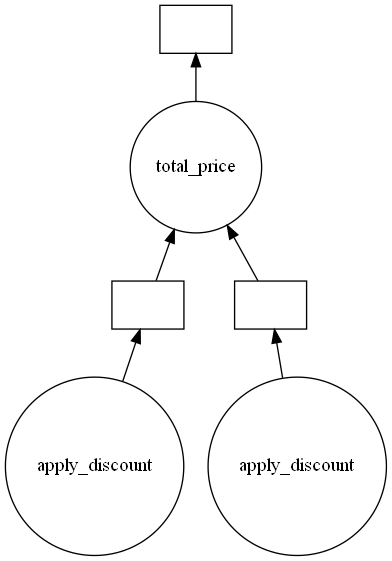

In [6]:
z.visualize()

In [7]:
# Return Square Of Number
def square(x):
    return x*x

# Return Double Of Number
def double(x):
    return x*2

# Add Two Numbers
def add(x, y):
    return x + y

# For loop that calls the above functions for each data
output = []
for i in range(6):
    a = delayed(square)(i)
    b = delayed(double)(i)
    c = delayed(add)(a, b)
    output.append(c)

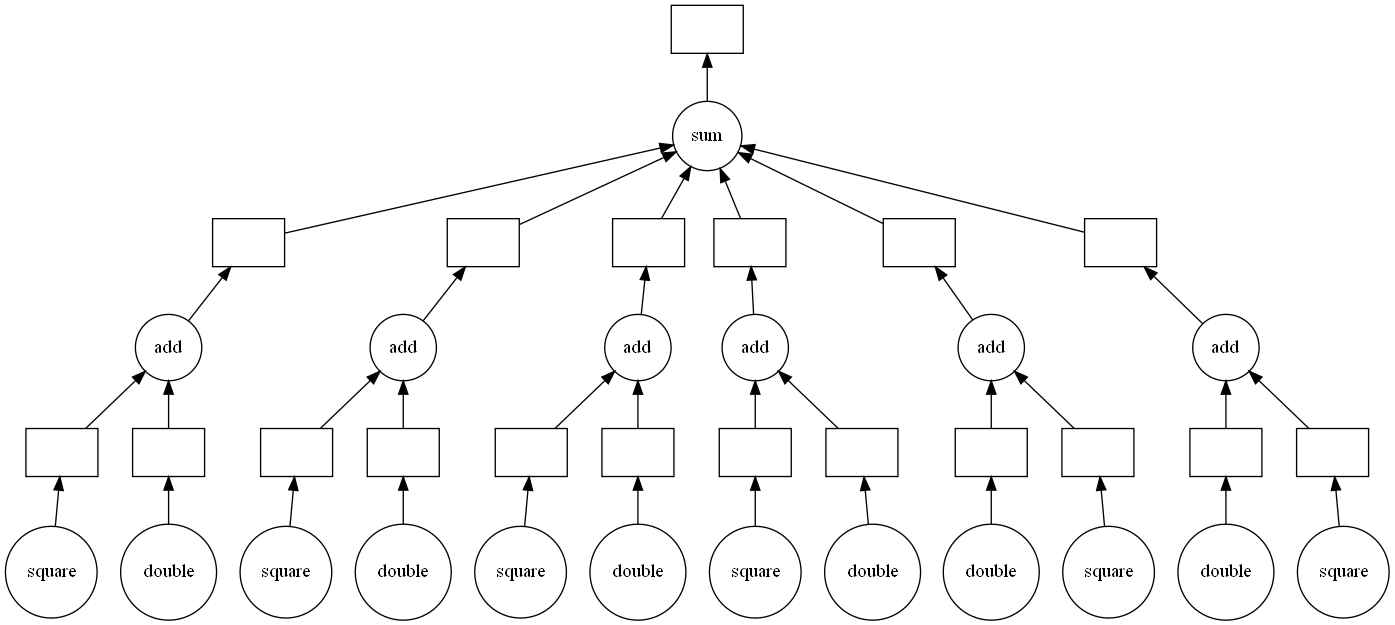

In [8]:
total = delayed(sum)(output)
total.visualize()

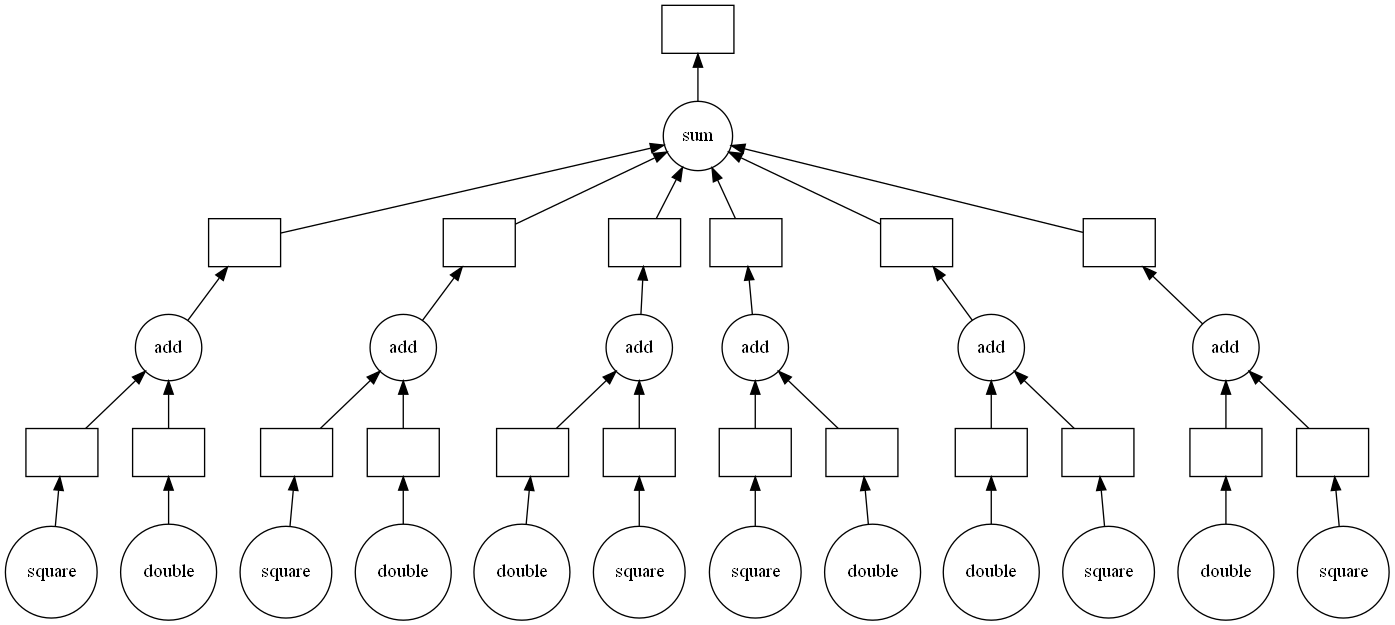

In [11]:
# Functions to perform mathematics operations
@delayed
def square(x):
    return x*x
@delayed
def double(x):
    return x*2
@delayed
def add(x, y):
    return x + y

# For loop that calls the above functions for each data
output = []
for i in range(6):
    a = square(i)
    b = double(i)
    c = add(a, b)
    output.append(c)

total = delayed(sum)(output)
total.visualize()

## Dask

In [14]:
dask.__version__

'2.10.1'

### Loading Already Available Data

In [15]:
df = dask.datasets.timeseries()

In [16]:
df

,id,name,x,y
npartitions=30,,,,
2000-01-01,int32,object,float64,float64
2000-01-02,...,...,...,...
...,...,...,...,...
2000-01-30,...,...,...,...
2000-01-31,...,...,...,...


In [18]:
df.head()

,id,name,x,y
timestamp,,,,
2000-01-01 00:00:00,1008,Sarah,-0.958414,-0.230525
2000-01-01 00:00:01,953,Tim,0.890308,-0.818239
2000-01-01 00:00:02,936,Tim,0.680714,-0.117953
2000-01-01 00:00:03,979,Ursula,-0.739270,0.156021
2000-01-01 00:00:04,1043,Laura,0.150593,-0.140182


### Group By Functions and Computations Of Dask

In [20]:
df1 = df.groupby('name').y.std()

In [22]:
df1

Dask Series Structure:
npartitions=1
    float64
        ...
Name: y, dtype: float64
Dask Name: sqrt, 67 tasks

In [26]:
df1.compute()

name
Alice       0.578123
Bob         0.577656
Charlie     0.577623
Dan         0.577038
Edith       0.577159
Frank       0.576973
George      0.576994
Hannah      0.576745
Ingrid      0.576198
Jerry       0.578256
Kevin       0.576154
Laura       0.577602
Michael     0.576354
Norbert     0.578044
Oliver      0.578171
Patricia    0.577641
Quinn       0.577055
Ray         0.577027
Sarah       0.576493
Tim         0.577375
Ursula      0.576160
Victor      0.578397
Wendy       0.577002
Xavier      0.576550
Yvonne      0.577624
Zelda       0.577826
Name: y, dtype: float64

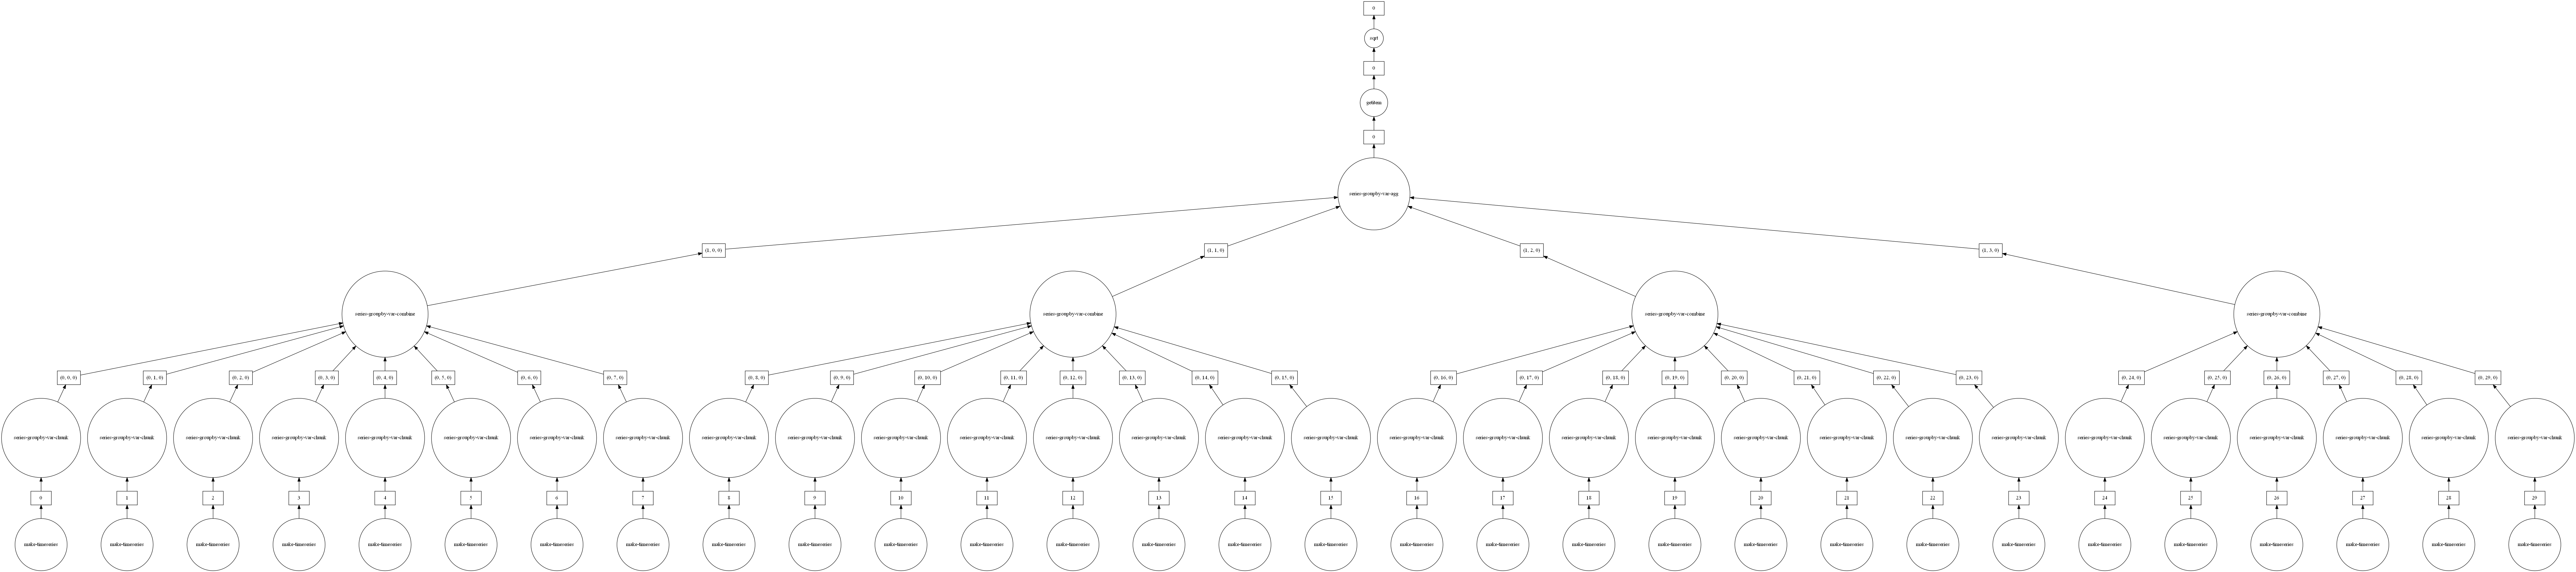

In [24]:
df1.visualize()

In [27]:
%time
df.loc['2000-01-01']

Wall time: 0 ns


,id,name,x,y
npartitions=1,,,,
2000-01-01 00:00:00.000000000,int32,object,float64,float64
2000-01-01 23:59:59.999999999,...,...,...,...


In [28]:
df = df.persist()

In [30]:
%time
df.loc['2000-01-01'].compute()

Wall time: 0 ns


,id,name,x,y
timestamp,,,,
2000-01-01 00:00:00,1008,Sarah,-0.958414,-0.230525
2000-01-01 00:00:01,953,Tim,0.890308,-0.818239
2000-01-01 00:00:02,936,Tim,0.680714,-0.117953
2000-01-01 00:00:03,979,Ursula,-0.739270,0.156021
2000-01-01 00:00:04,1043,Laura,0.150593,-0.140182
2000-01-01 00:00:05,998,Kevin,-0.939297,0.182850
2000-01-01 00:00:06,1081,Victor,-0.449187,-0.052520
2000-01-01 00:00:07,1023,Ingrid,0.247161,-0.988517
2000-01-01 00:00:08,1036,Bob,-0.098542,0.111626


In [31]:
dask_bag = dask.bag.from_sequence(['I', 'am', 'learning', 'dask'], partition_size = 2)

dask_bag.visualize() #--->[0] [1]

AttributeError: module 'dask' has no attribute 'bag'

### Visualizing With Dask Dataframe

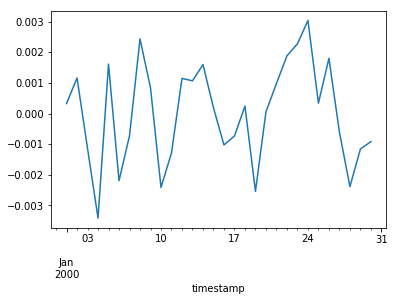

In [40]:
%matplotlib inline
df['y'].resample('24h').mean().compute().plot()

In [41]:
len(df)

2592000

## Comparing Pandas Dataframe and Dask Dataframe

In [2]:
client = Client(processes = False)

In [3]:
client

Client Scheduler: inproc://172.16.10.157/9792/1 Dashboard: http://172.16.10.157:8787/status,Cluster Workers: 1 Cores: 4 Memory: 17.06 GB


### Pandas DataFrame

In [7]:
df = pd.DataFrame(np.random.random(size=(10000000, 4)),
                            columns=['param_a', 'param_b', 'param_c', 'param_d'])
df.head()

,param_a,param_b,param_c,param_d
0,0.741913,0.586257,0.597822,0.315434
1,0.345357,0.581468,0.209645,0.461407
2,0.215362,0.270940,0.495992,0.398860
3,0.239355,0.639353,0.940957,0.718442
4,0.572661,0.044719,0.682655,0.971964


In [8]:
def costly_simulation(list_param):
    time.sleep(3)
    return sum(list_param)

In [10]:
%%time
results = []
for col in df.columns:
    result = costly_simulation(df[col].values)
    results.append(result)

Wall time: 23.8 s


In [11]:
results

[5000707.268977051, 4999155.098291191, 4999714.665143318, 4999955.731023595]

### Dask DataFrame

In [13]:
%%time
results = []
for col in df.columns:
    result =dask.delayed(costly_simulation)(df[col].values)
    results.append(result)

Wall time: 74.9 ms


In [14]:
results[0]

Delayed('costly_simulation-6ff5913d-71b9-4645-a6f7-ca6ab5b39409')

In [15]:
%time dask.compute(*results)

C:\Users\Devansh\Anaconda3\lib\site-packages\distributed\worker.py:3460: UserWarning: Large object of size 80.00 MB detected in task graph: 
  (array([0.74191304, 0.34535691, 0.2153621 , ..., 0 ...  0.77232715]),)
Consider scattering large objects ahead of time
with client.scatter to reduce scheduler burden and 
keep data on workers

    future = client.submit(func, big_data)    # bad

    big_future = client.scatter(big_data)     # good
    future = client.submit(func, big_future)  # good
  % (format_bytes(len(b)), s)


Wall time: 14 s


(5000707.268977051, 4999155.098291191, 4999714.665143318, 4999955.731023595)

tornado.application - ERROR - Uncaught exception in /graph/ws
Traceback (most recent call last):
  File "C:\Users\Devansh\Anaconda3\lib\site-packages\tornado\websocket.py", line 498, in _run_callback
    result = callback(*args, **kwargs)
  File "C:\Users\Devansh\Anaconda3\lib\site-packages\tornado\web.py", line 2949, in wrapper
    return method(self, *args, **kwargs)
  File "C:\Users\Devansh\Anaconda3\lib\site-packages\bokeh\server\views\ws.py", line 126, in open
    if self.selected_subprotocol != 'bokeh':
AttributeError: 'WSHandler' object has no attribute 'selected_subprotocol'
tornado.application - ERROR - Uncaught exception in /status/ws
Traceback (most recent call last):
  File "C:\Users\Devansh\Anaconda3\lib\site-packages\tornado\websocket.py", line 498, in _run_callback
    result = callback(*args, **kwargs)
  File "C:\Users\Devansh\Anaconda3\lib\site-packages\tornado\web.py", line 2949, in wrapper
    return method(self, *args, **kwargs)
  File "C:\Users\Devansh\Anaconda3\li